## 简介
-----------------------------
本文主要是针对一个常见的数据集(关于Iris这种花的类别预测)进行可视化分析，目的其一在于体验数据分析的过程，其二学习各种可视化统计图。
经过以下的分析，此数据集过于简单，所以本篇文章重点还是要放在如何以及为什么会使用这种统计图上。

下面开始我们的分析之旅。

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",color_codes=True)
%matplotlib inline
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


- 此数据集非常标准，不存在缺项，且特征的值也比较标准。它仅含有四个特征，分别为Sepal以及Petal的长度跟宽度。

In [9]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

- 根据统计，一共有三种类型，且每一种类型各有50个，这就不存在正负比例悬殊大的问题了。

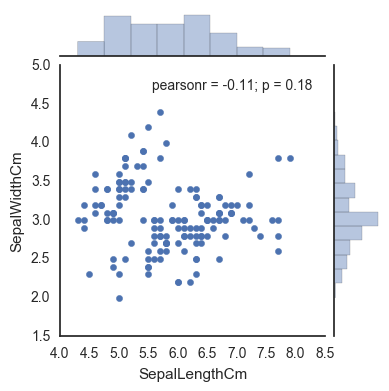

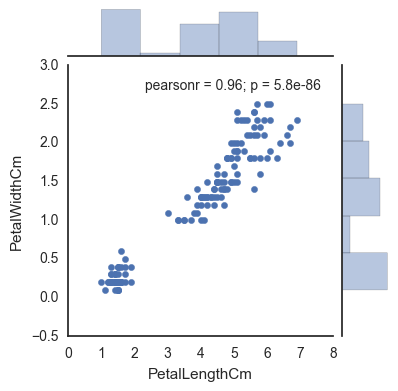

In [31]:
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=iris,size=4)
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,size=4)

- seaborn的joinplot()，同时绘制单变量(直方图)以及二元变量(散点图)的统计图。这个图信息含量有限，第一幅图绘制的Sepal的长宽关系，看得出一个大致的45°界限，第二幅图绘制的Petal的长宽关系，看得出有一个明显的界限，有一个种类被明显隔离出来了，但具体是哪一个种类就不知道了。
- joinplot()不止可以绘制散点图，其有一个kind参数，可以设置为{"scatter"|"reg"|"resid"|"kde"|"hex"}，默认为scatter。

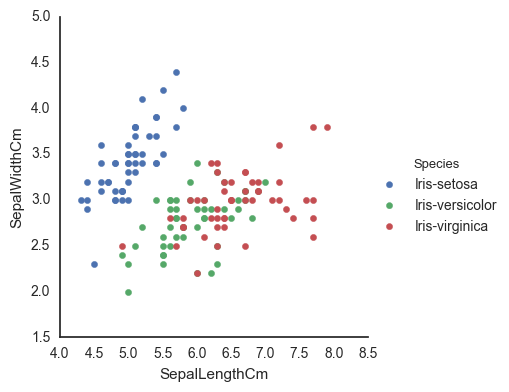

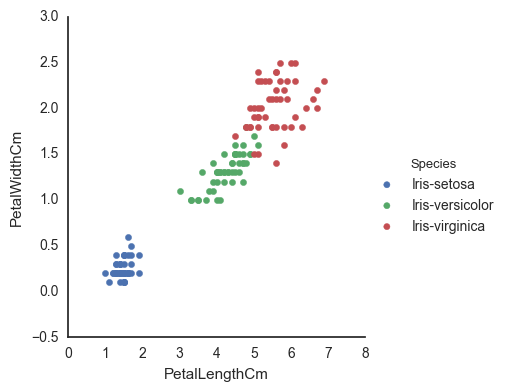

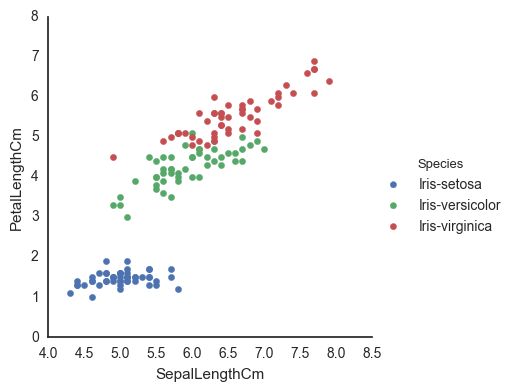

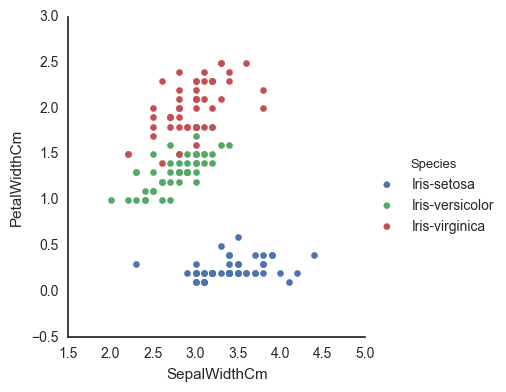

In [70]:
sns.FacetGrid(iris,hue="Species",size=4).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=4).map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=4).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=4).map(plt.scatter,"SepalWidthCm","PetalWidthCm").add_legend()

- 经过使用facetgrid()对两两特征进行统计，并使用不同的颜色表示出来，分界线就再明显不过了。只有第一幅图，不能仅用Sepal的长宽就能区分三类，其余三组特征都能很明显的将三个类别给区分开来，可以通过构造决策树的方式来拟合模型。
- 绘图语法为sns.FacetGrid().map()，FacetGrid()实际上是返回了一个空的坐标系，然后通过map()函数在坐标系上进行可视化。
- 官方文档介绍，FacetGrid实际上是用来绘制多个轴(即多变量)与另一个变量在不同层面上的关系。上边绘制的实际是三维的情况，只是第三维我们用颜色来区分了。

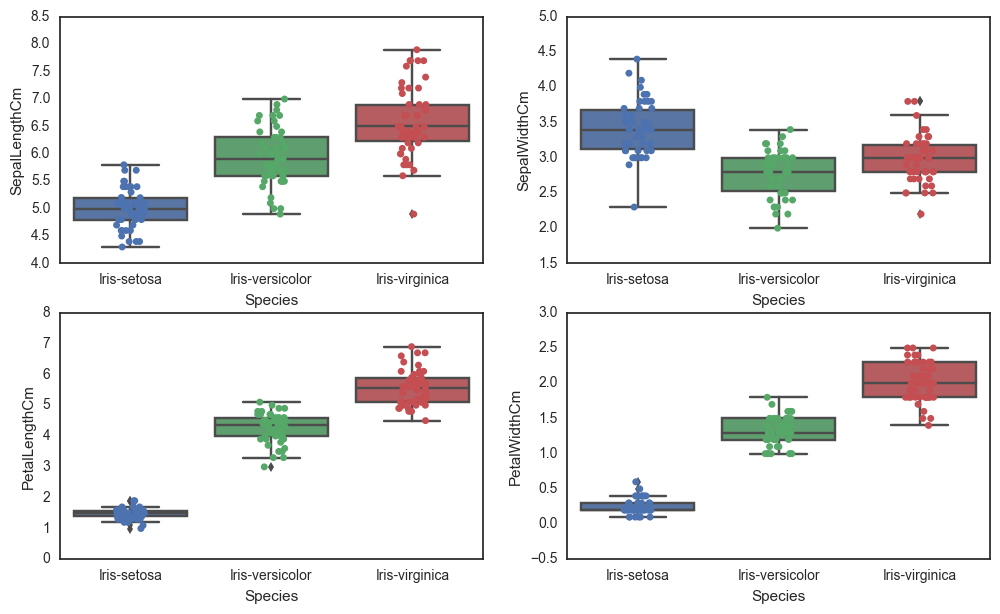

In [57]:
f,axes=plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="Species",y="SepalLengthCm",data=iris,ax=axes[0,0])
sns.stripplot(x="Species",y="SepalLengthCm",data=iris,jitter=True,edgecolor="gray",ax=axes[0,0])
sns.boxplot(x="Species",y="SepalWidthCm",data=iris,ax=axes[0,1])
sns.stripplot(x="Species",y="SepalWidthCm",data=iris,jitter=True,edgecolor="gray",ax=axes[0,1])
sns.boxplot(x="Species",y="PetalLengthCm",data=iris,ax=axes[1,0])
sns.stripplot(x="Species",y="PetalLengthCm",data=iris,jitter=True,edgecolor="gray",ax=axes[1,0])
sns.boxplot(x="Species",y="PetalWidthCm",data=iris,ax=axes[1,1])
sns.stripplot(x="Species",y="PetalWidthCm",data=iris,jitter=True,edgecolor="gray",ax=axes[1,1])

### 箱形图
- 首先，应该知道这个箱形图代表着什么。以上每个箱从上至下共有五条横线，分别代表了最大正常值，上四分位数(Q1)，中位数，下四分位数(Q3)，最小正常值。在有些图里含有一些黑点，表示的是一些异常值。
- 那么，如何断定异常值？定义IRQ为四分位距，其计算方式为IRQ=Q1-Q3。其与方差、标准差类似，表示统计资料中变量的分散情况。异常点就是处在(Q1+1.5IRQ,Q3-1.5IRQ)这个范围之外的点。若异常点超过了(Q1+3IRQ,Q3-3IRQ)，就属于极端的异常点，否则为温和的异常点。
- 箱形图的最大、最小正常值就指的是不是异常值的最远点，表示该批数据的正常值的分布区间。

### 分析
- 从底下两幅图来看，Petal这个特征能够很好的区分出“setosa”这类Iris，不论是从PetalLengthCm还是从PetalLengthCm都能很清晰的分辨此类，这个结论跟上边的散点图的结论是一样的。上边散点图是在L和W两个维度上同时分析，事实上，我们仅用其中一个特征，就足够判别了。

箱形图实际上只反映了几个关键点的数据，直观上只能看出数据的总体结构，再加上绘制在上边的散点图，我们才能够看出更清晰的数据分布，但是缺点是不直观，点的分布不均导致图显得混乱，此时**violinplot**则结合了以上两种优点。

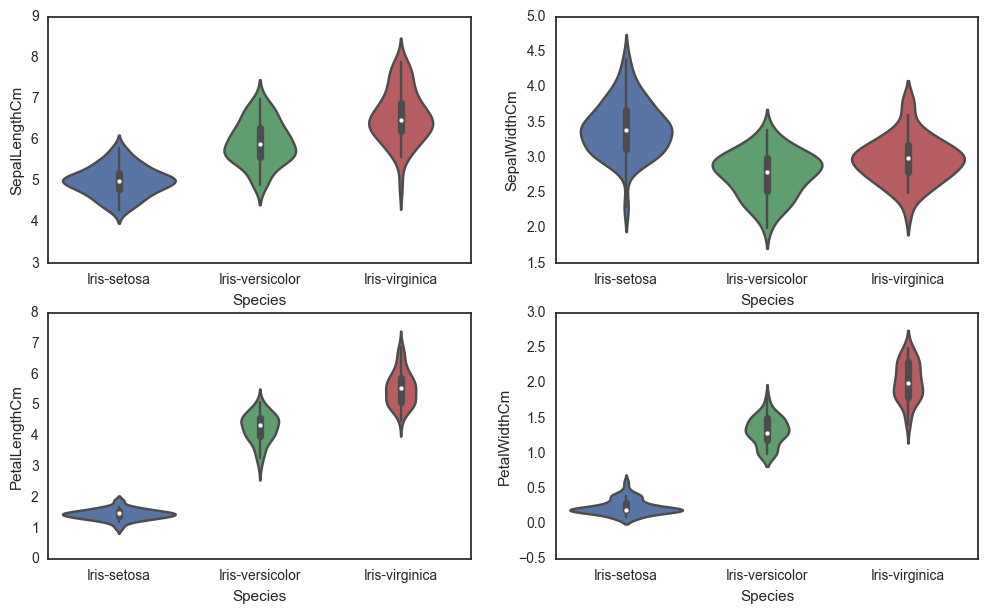

In [58]:
f,axes=plt.subplots(2,2,figsize=(12,7))
sns.violinplot(x="Species",y="SepalLengthCm",data=iris,ax=axes[0,0])
sns.violinplot(x="Species",y="SepalWidthCm",data=iris,ax=axes[0,1])
sns.violinplot(x="Species",y="PetalLengthCm",data=iris,ax=axes[1,0])
sns.violinplot(x="Species",y="PetalWidthCm",data=iris,ax=axes[1,1])

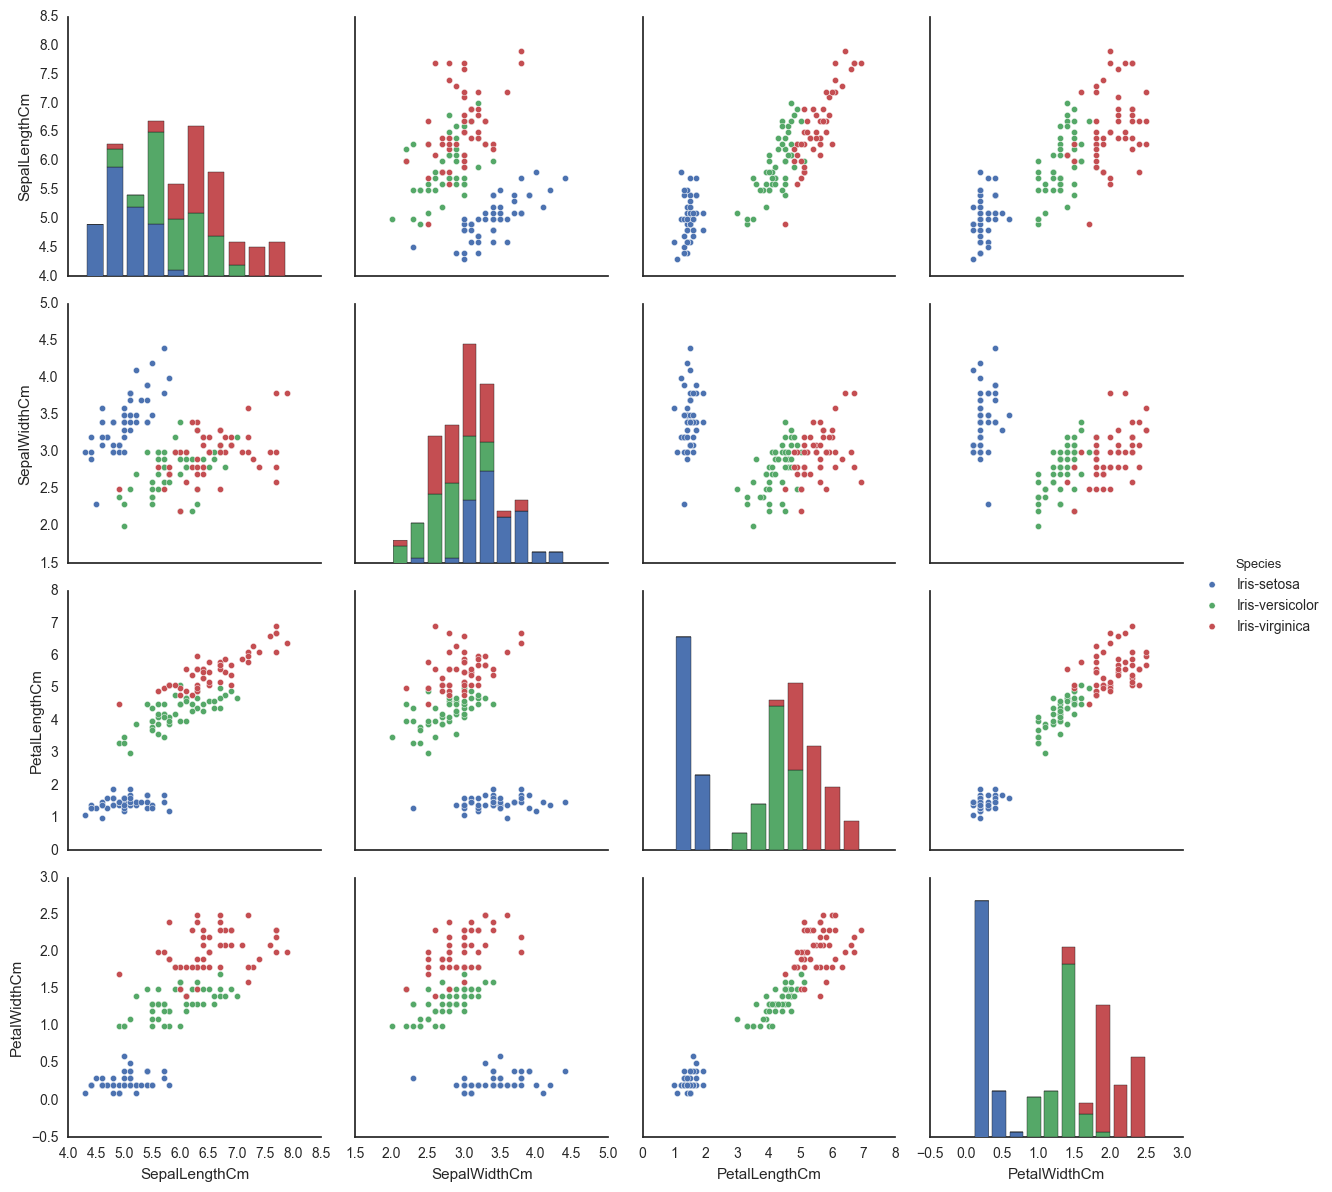

In [71]:
sns.pairplot(iris.drop("Id",axis=1),hue="Species",size=3)

- pairplot()绘制了除了我们给定的hue外，其他所有特征两两之间的关系，有一半的图实际上是重复的。

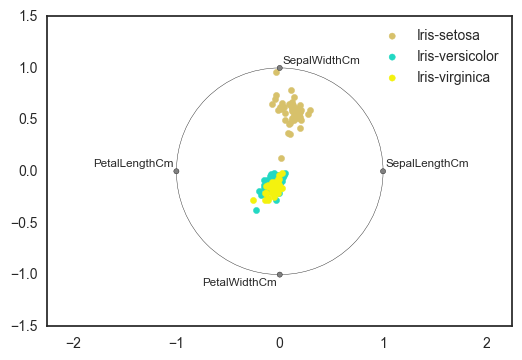

In [72]:
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

- 对于这个图，理解的不是很透彻，感觉是统计了每个特征对于分类的权重大小，越靠近，表示重要度越大。

本文参考自：
>https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/comments